## Hamoye Internship Stage B
### Predicting Energy Efficiency of Buildings
### Name: Shaik Mubasher Uddin

#  Quieres  Covered

* How much energy is consumed in indoor and outdoor appliances?
* what is the coerration of humidity and temperature in indoor and outdoor environment?
* Does the environment of sensor affects the way enegry is consumed by appliances?
* Identify the appliances with low efficiency in home (which room)
* relationship between appliances and light
* How weather is coerrated with the energy consumption in homes and why this study is important? 

In [1]:
# importing libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import datetime as dt
from datetime import datetime
from matplotlib import pyplot as plt
import plotly.express as px


import warnings 
warnings.simplefilter('ignore')
%matplotlib Inline


# Data exploration:

In [2]:
#reading the dataset

data = pd.read_csv("energydata_complete.csv")

In [3]:
#looking at the dataset
data.head(3)

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  

[3 rows x 29 columns]

In [4]:
data.tail(5)

date  Appliances  lights         T1       RH_1  \
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3    T4  ...    T9     RH_9  \
19730  25.890000  42.025714  27.200000  41.163333  24.7  ...  23.2  46.7900   
19731  25.754000  42.080000  27.133333  41.223333  24.7  ...  23.2  46.7900   
19732  25.628571  42.768571  27.050000  41.690000  24.7  ...  23.2  46.7900   
19733  25.414000  43.036000  26.890000  41.290000  24.7  ...  23.2  46.8175   
19734  25.264286  42.971429  26.823333  41.156667  24.7  ...  23.2  46.8450   

           T_out  Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  \
19730  22.733333        755.2  55.666667   3.333333   23.666667  13.333333   
19731  22.600000        755.2  56.000000   3.500000   24.500000  13.300000   
19732  22.466667        755.2  56.333333   3.666667   25.333333  13.266667   
19733  22.333333        755.2  56.666667   3.833333   26.166667  13.233333   
19734  22.200000        755.2  57.000000   4.000000   27.000000  13.200000   

             rv1        rv2  
19730  43.096812  43.096812  
19731  49.282940  49.282940  
19732  29.199117  29.199117  
19733   6.322784   6.322784  
19734  34.118851  34.118851  

[5 rows x 29 columns]

In [5]:
data.shape

(19735, 29)

In [6]:
data.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

In [7]:
#looking at null values
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [8]:
#checking datatype
data.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [10]:
#converting date into datetime
data['date'] = data['date'].astype('datetime64[ns]')

In [11]:
data.head(2)

date  Appliances  lights     T1       RH_1    T2     RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.7900   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.7225   

      T3   RH_3    T4  ...         T9   RH_9     T_out  Press_mm_hg  RH_out  \
0  19.79  44.73  19.0  ...  17.033333  45.53  6.600000        733.5    92.0   
1  19.79  44.79  19.0  ...  17.066667  45.56  6.483333        733.6    92.0   

   Windspeed  Visibility  Tdewpoint        rv1        rv2  
0   7.000000   63.000000        5.3  13.275433  13.275433  
1   6.666667   59.166667        5.2  18.606195  18.606195  

[2 rows x 29 columns]

#data['Dates'] = data['date'].values

In [12]:
data['Date'] = pd.to_datetime(data['date']).dt.date
data['Time'] = pd.to_datetime(data['date']).dt.time
data['hour'] = data['date'].dt.hour
data['month'] = data['date'].dt.month
data.tail(2)


date  Appliances  lights    T1   RH_1         T2  \
19733 2016-05-27 17:50:00         420      10  25.5  46.99  25.414000   
19734 2016-05-27 18:00:00         430      10  25.5  46.60  25.264286   

            RH_2         T3       RH_3    T4  ...     RH_out  Windspeed  \
19733  43.036000  26.890000  41.290000  24.7  ...  56.666667   3.833333   
19734  42.971429  26.823333  41.156667  24.7  ...  57.000000   4.000000   

       Visibility  Tdewpoint        rv1        rv2        Date      Time  \
19733   26.166667  13.233333   6.322784   6.322784  2016-05-27  17:50:00   
19734   27.000000  13.200000  34.118851  34.118851  2016-05-27  18:00:00   

       hour  month  
19733    17      5  
19734    18      5  

[2 rows x 33 columns]

# visualizing the data
**- Correlation for all columns**

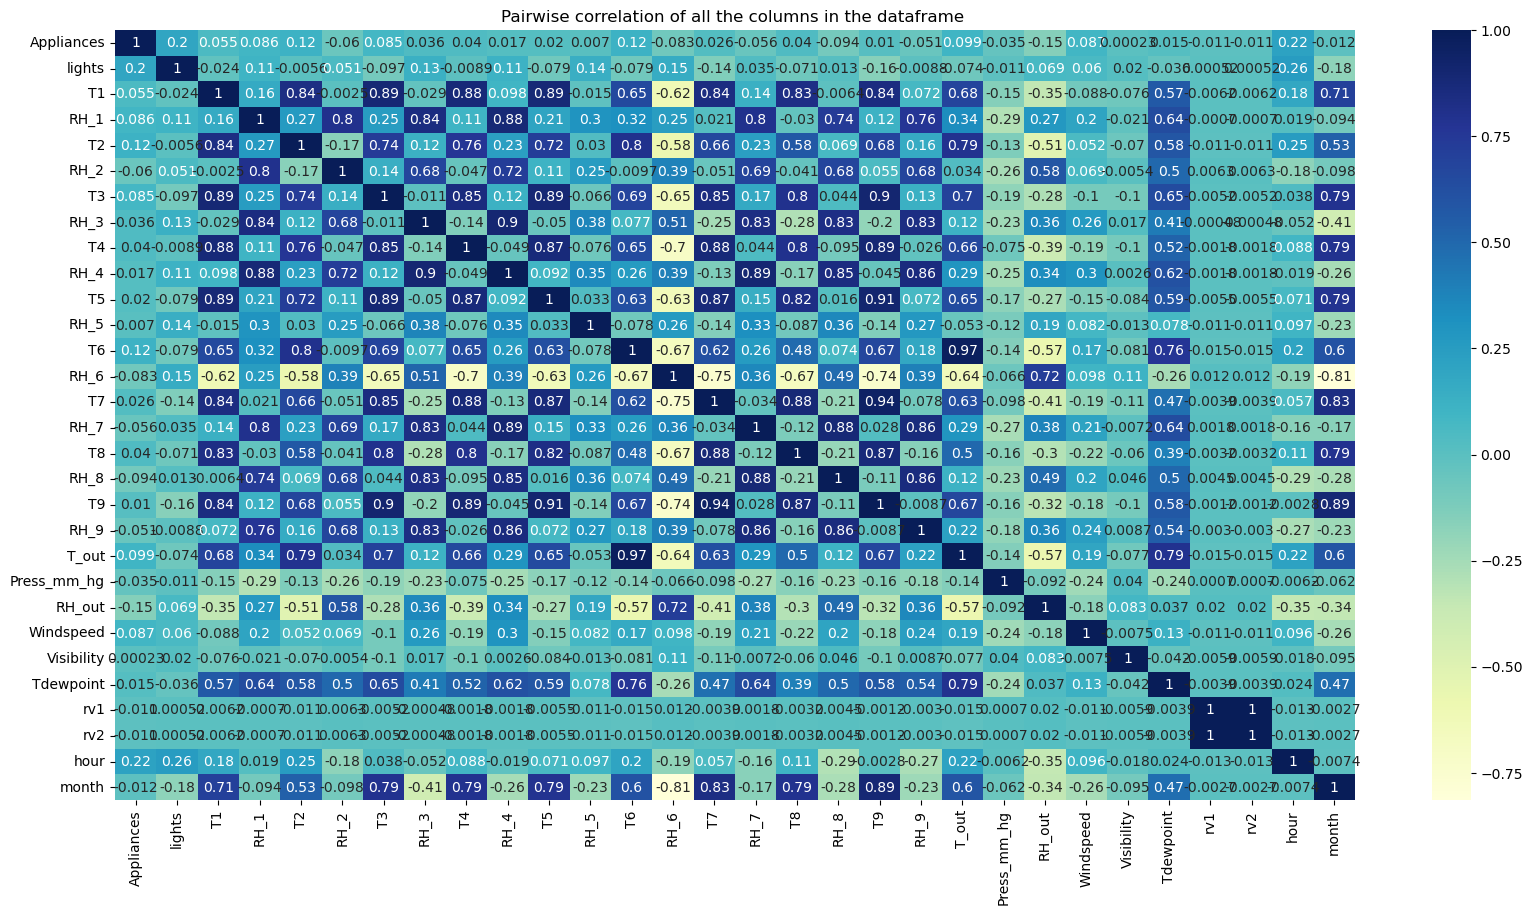

In [13]:
plt.figure(figsize = (20,10))
sns.heatmap(data= data.corr(), cmap="YlGnBu", annot= True)
plt.title("Pairwise correlation of all the columns in the dataframe ")
plt.show()

**Analyzing Humdity :**

In [14]:
#dropping columns to see humidity indoor and outdoor and how its correlated over time period 
new_data = data.loc[:, data.columns.drop(['date','Appliances', 'lights','T1','T2','T3','T4','T5','T6','T7','T8','T9','T_out','Press_mm_hg','Windspeed','Visibility','Tdewpoint','rv1','rv2'])]
print(new_data)


            RH_1       RH_2       RH_3       RH_4       RH_5       RH_6  \
0      47.596667  44.790000  44.730000  45.566667  55.200000  84.256667   
1      46.693333  44.722500  44.790000  45.992500  55.200000  84.063333   
2      46.300000  44.626667  44.933333  45.890000  55.090000  83.156667   
3      46.066667  44.590000  45.000000  45.723333  55.090000  83.423333   
4      46.333333  44.530000  45.000000  45.530000  55.090000  84.893333   
...          ...        ...        ...        ...        ...        ...   
19730  46.560000  42.025714  41.163333  45.590000  52.400000   1.000000   
19731  46.500000  42.080000  41.223333  45.590000  52.326667   1.000000   
19732  46.596667  42.768571  41.690000  45.730000  52.266667   1.000000   
19733  46.990000  43.036000  41.290000  45.790000  52.200000   1.000000   
19734  46.600000  42.971429  41.156667  45.963333  52.200000   1.000000   

            RH_7       RH_8     RH_9     RH_out        Date      Time  hour  \
0      41.626667  48

**-Correlation matrix for humdity indoor and outdoor**

In [15]:
corr_data=new_data.corr()

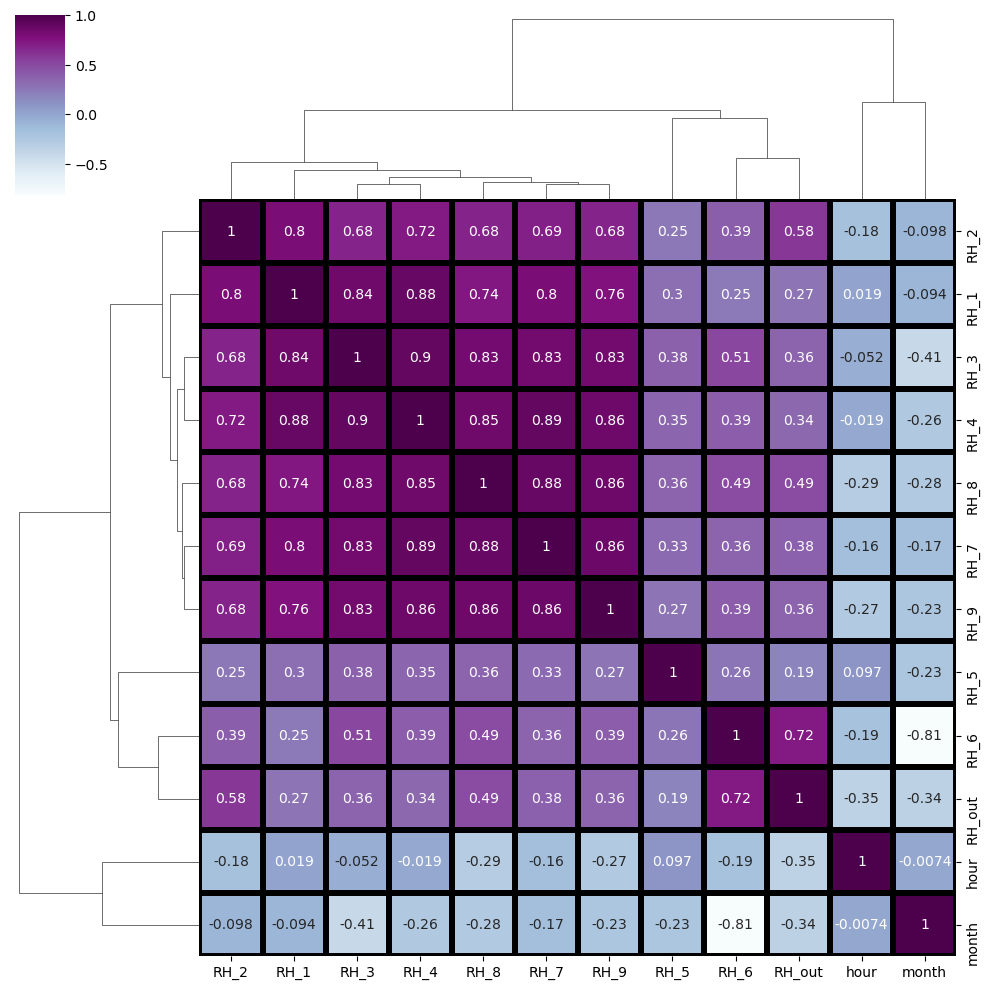

In [16]:
sns.clustermap(corr_data,  cmap="BuPu", annot=True, linecolor="black", linewidth=3)

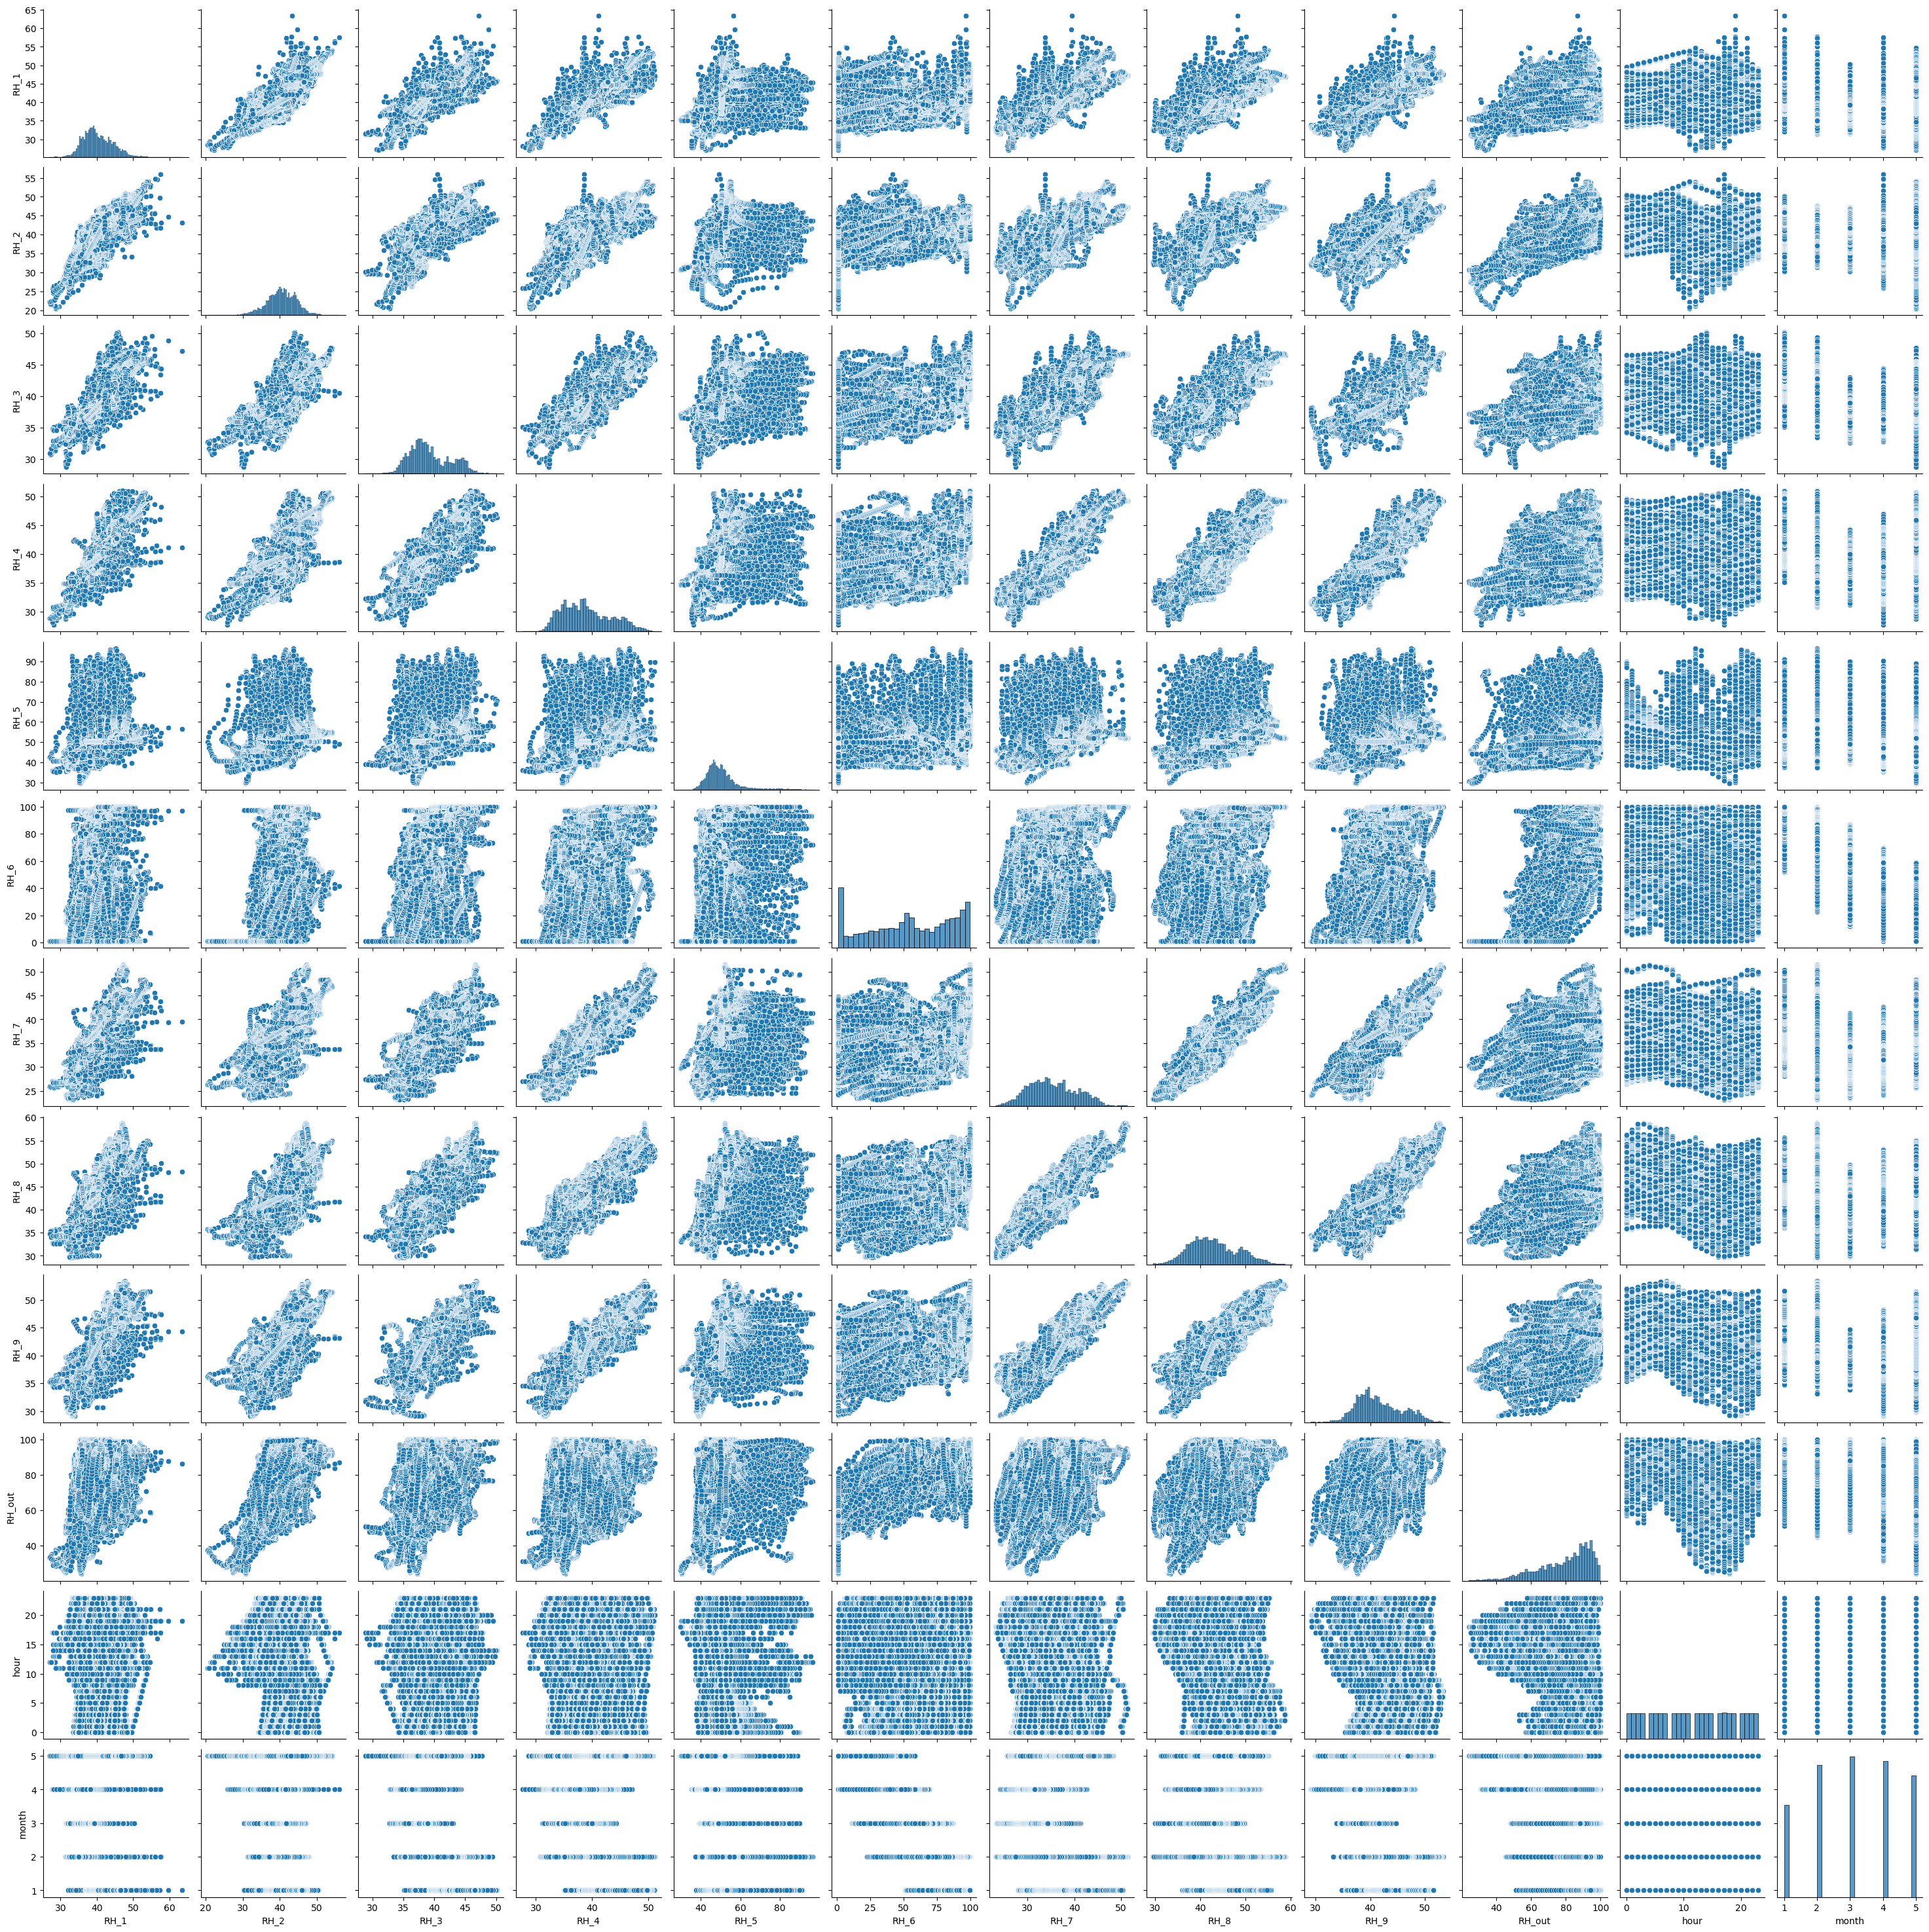

In [17]:
sns.pairplot(new_data, kind='scatter')
plt.show()

RH_1, Humidity in kitchen area, in %
RH_2, Humidity in living room area, in %
RH_3, Humidity in laundry room area, in %
RH_4, Humidity in office room, in %
RH_5, Humidity in bathroom, in %
RH_6, Humidity outside the building (north side), in %
RH_7, Humidity in ironing room, in %
RH_8, Humidity in teenager room 2, in %
RH_9, Humidity in parents room, in %
RH_out, Humidity outside (from Chievres weather station), in %

**Energy consumption of appliances:(time series) For First Month**

In [18]:
data.head(5)


date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...  RH_out  Windspeed  Visibility  Tdewpoint  \
0  19.79  44.730000  19.000000  ...    92.0   7.000000   63.000000        5.3   
1  19.79  44.790000  19.000000  ...    92.0   6.666667   59.166667        5.2   
2  19.79  44.933333  18.926667  ...    92.0   6.333333   55.333333        5.1   
3  19.79  45.000000  18.890000  ...    92.0   6.000000   51.500000        5.0   
4  19.79  45.000000  18.890000  ...    92.0   5.666667   47.666667        4.9   

         rv1        rv2        Date      Time  hour  month  
0  13.275433  13.275433  2016-01-11  17:00:00    17      1  
1  18.606195  18.606195  2016-01-11  17:10:00    17      1  
2  28.642668  28.642668  2016-01-11  17:20:00    17      1  
3  45.410389  45.410389  2016-01-11  17:30:00    17      1  
4  10.084097  10.084097  2016-01-11  17:40:00    17      1  

[5 rows x 33 columns]

In [19]:
data['Date'] = pd.to_datetime(data['Date'])
energy = data.loc[(data['Date'] >= '2016-01-11')
                     & (data['Date'] < '2016-01-30')]

In [20]:
energy = data[[ 'Date','Appliances']]
energy.tail(5)

Date  Appliances
19730 2016-05-27         100
19731 2016-05-27          90
19732 2016-05-27         270
19733 2016-05-27         420
19734 2016-05-27         430

In [21]:
energy.dtypes

Date          datetime64[ns]
Appliances             int64
dtype: object

In [22]:
energy['Date'] = pd.to_datetime(energy['Date'])
# Set the date as index 
energy = energy.set_index('Date')
energy.head()

Appliances
Date                  
2016-01-11          60
2016-01-11          60
2016-01-11          50
2016-01-11          50
2016-01-11          60

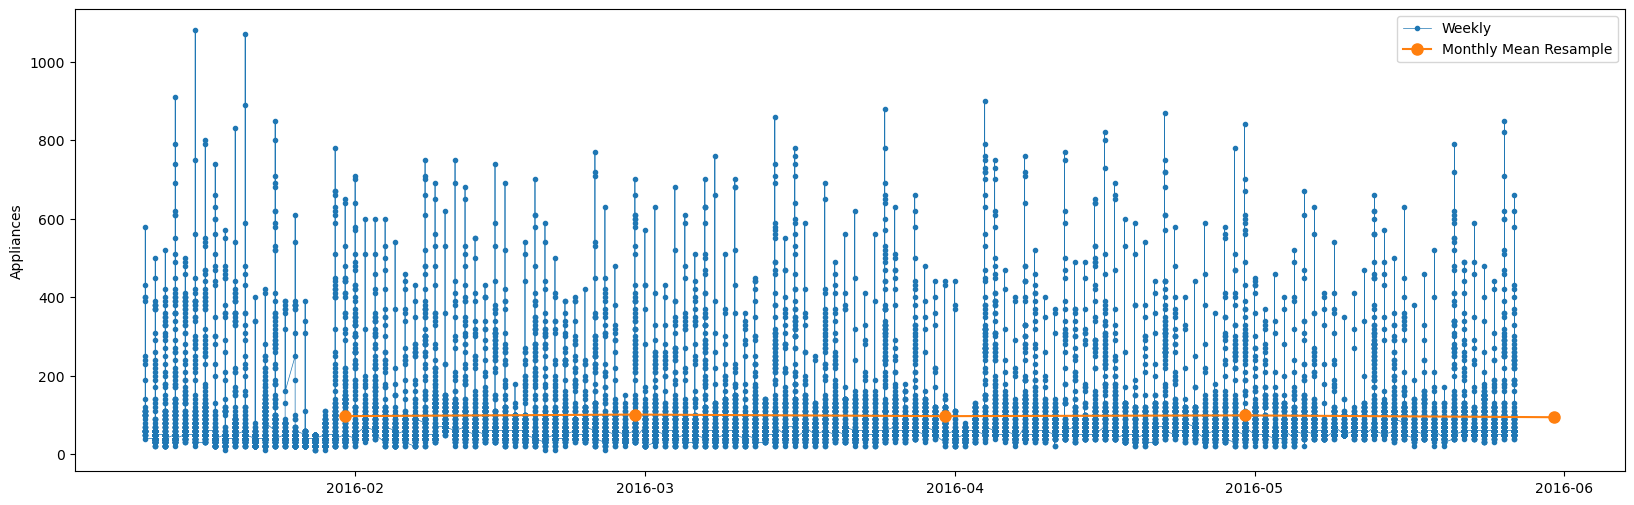

In [23]:
import warnings
y = energy['Appliances']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Appliances')
ax.legend();

**energy consumption for whole time period:**

In [24]:
energywhole = data[['Date','Appliances']]
energywhole.tail(5)

Date  Appliances
19730 2016-05-27         100
19731 2016-05-27          90
19732 2016-05-27         270
19733 2016-05-27         420
19734 2016-05-27         430

In [25]:
energywhole['Date'] = pd.to_datetime(energywhole['Date'])
# Set the date as index 
energywhole = energywhole.set_index('Date')
energywhole.head(3)

Appliances
Date                  
2016-01-11          60
2016-01-11          60
2016-01-11          50

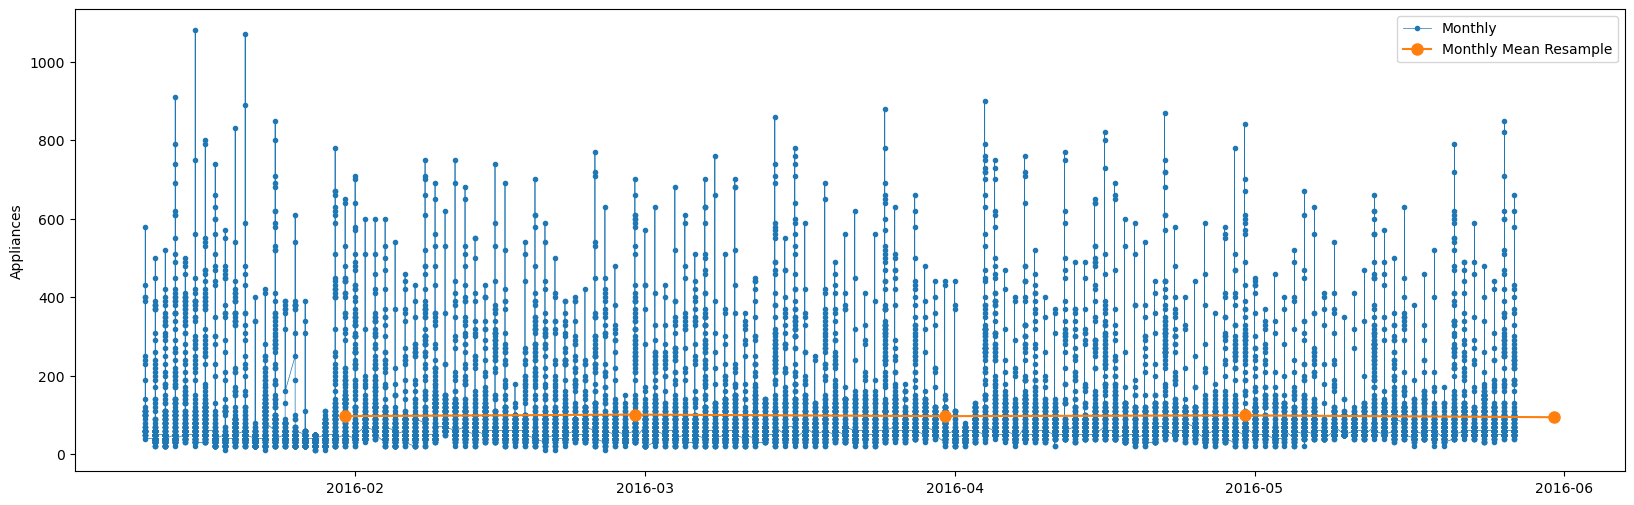

In [26]:
y = energywhole['Appliances']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Appliances')
ax.legend();

`feb` month has the highest energy consumption of appliances in home. This could mean people stayed more inside in the month feb. To find out if they stayed inside more because of weather conditions further analysis is made.

**Energy distribution of light (Wh) in appliances :**

In [27]:
energy1 = data[['Appliances','lights']]

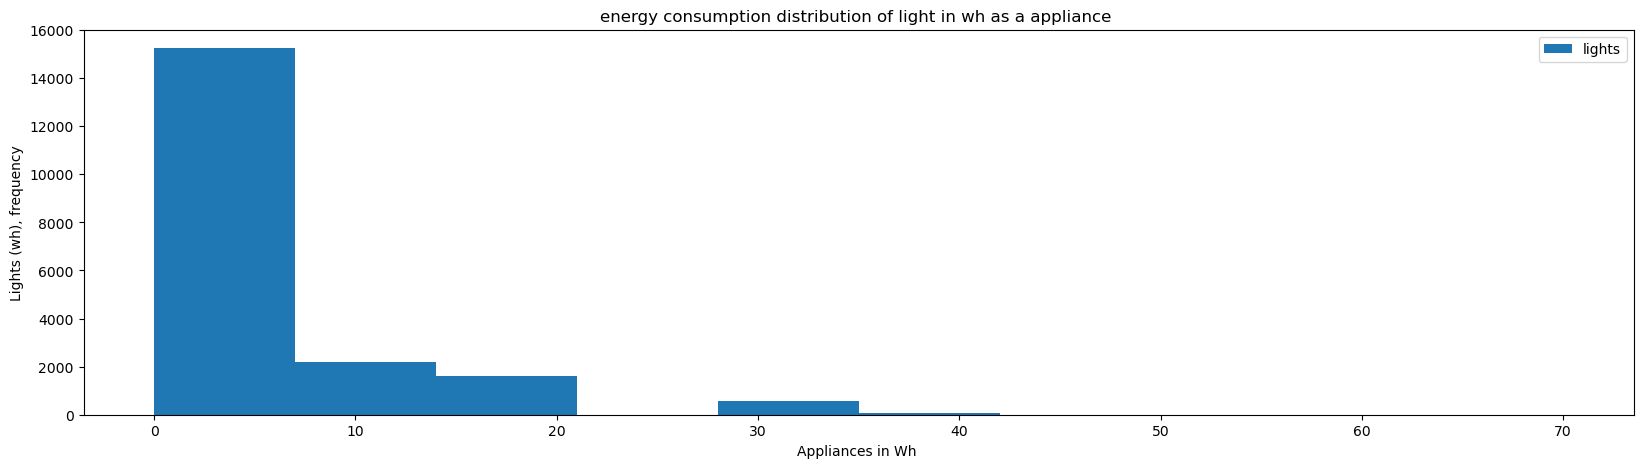

In [28]:
energy1.plot( x='Appliances', y='lights', figsize=(20, 5),kind='hist')
plt.xlabel("Appliances in Wh ")
plt.ylabel("Lights (wh), frequency")
plt.title("energy consumption distribution of light in wh as a appliance ")
plt.show()

The most used light is around 10 Watt-hour and the less used light bulb is `40 wh  ` 

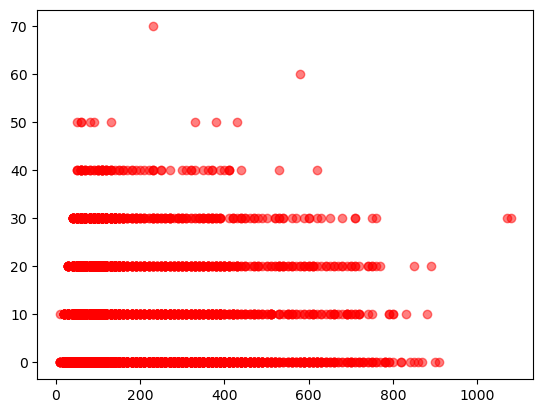

In [29]:
x= data["Appliances"]
y= data["lights"]
size=(20)
plt.scatter(x,y,color=["r"], alpha=0.5)

 **Appliances energy consumption with regards to weather outside:** 

In [30]:
data.head(2)


date  Appliances  lights     T1       RH_1    T2     RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.7900   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.7225   

      T3   RH_3    T4  ...  RH_out  Windspeed  Visibility  Tdewpoint  \
0  19.79  44.73  19.0  ...    92.0   7.000000   63.000000        5.3   
1  19.79  44.79  19.0  ...    92.0   6.666667   59.166667        5.2   

         rv1        rv2       Date      Time  hour  month  
0  13.275433  13.275433 2016-01-11  17:00:00    17      1  
1  18.606195  18.606195 2016-01-11  17:10:00    17      1  

[2 rows x 33 columns]

In [31]:
energy2 = data[['Appliances','Windspeed','Press_mm_hg']]

In [32]:
corr= energy2.corr()
corr

Appliances  Windspeed  Press_mm_hg
Appliances     1.000000   0.087122    -0.034885
Windspeed      0.087122   1.000000    -0.235032
Press_mm_hg   -0.034885  -0.235032     1.000000

<AxesSubplot:>

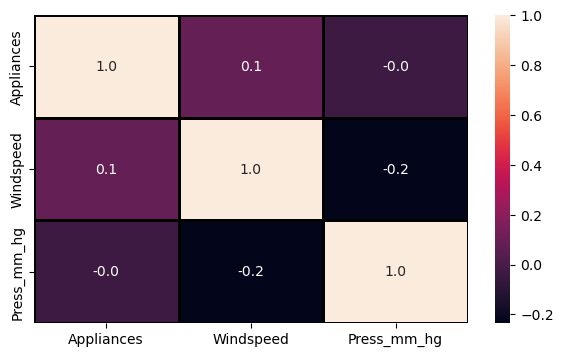

In [33]:
plt.figure(figsize=(7,4))
sns.heatmap(corr, annot=True, linecolor="black", linewidths=1, fmt='.1f')

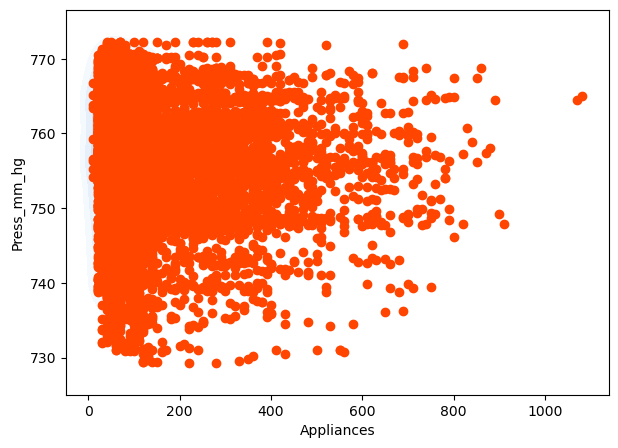

In [34]:
fig, ax = plt.subplots(1, figsize=(7,5))
sns.kdeplot(energy2.Appliances,energy2.Press_mm_hg,cmap='Blues',
           shade=True, shade_lowest=False)
plt.scatter(energy2.Appliances, energy2.Press_mm_hg,color='orangered')

In [35]:
energyweather = data[['Date','Press_mm_hg']]
energyweather.tail(2)

Date  Press_mm_hg
19733 2016-05-27        755.2
19734 2016-05-27        755.2

In [36]:
energyweather['Date'] = pd.to_datetime(energyweather['Date'])
# Set the date as index 
energyweather = energyweather.set_index('Date')
energyweather.head(3)

Press_mm_hg
Date                   
2016-01-11        733.5
2016-01-11        733.6
2016-01-11        733.7

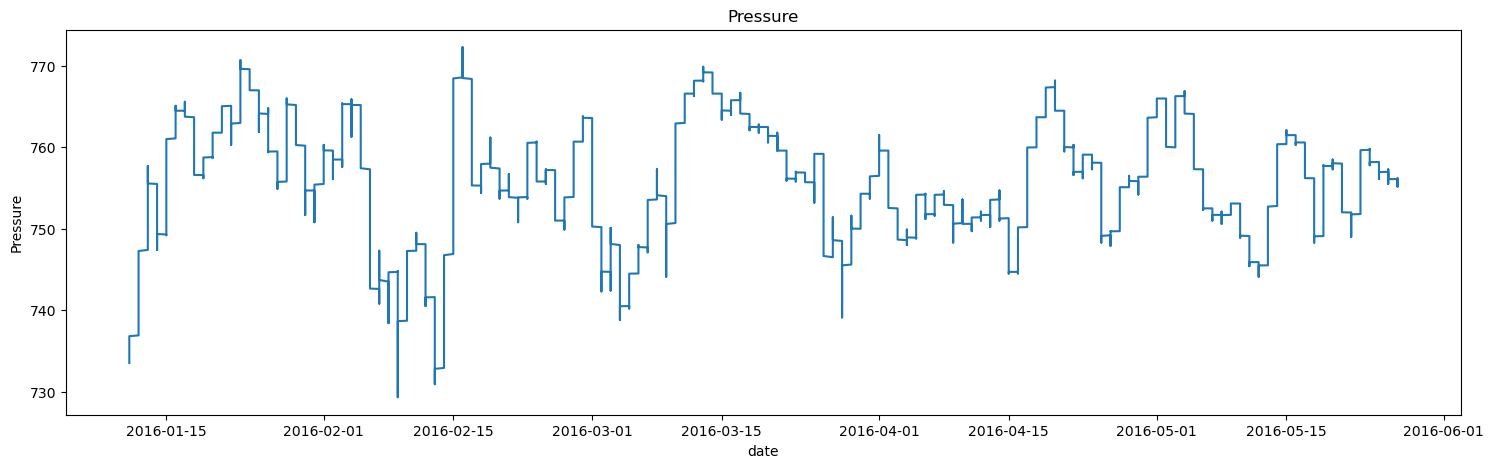

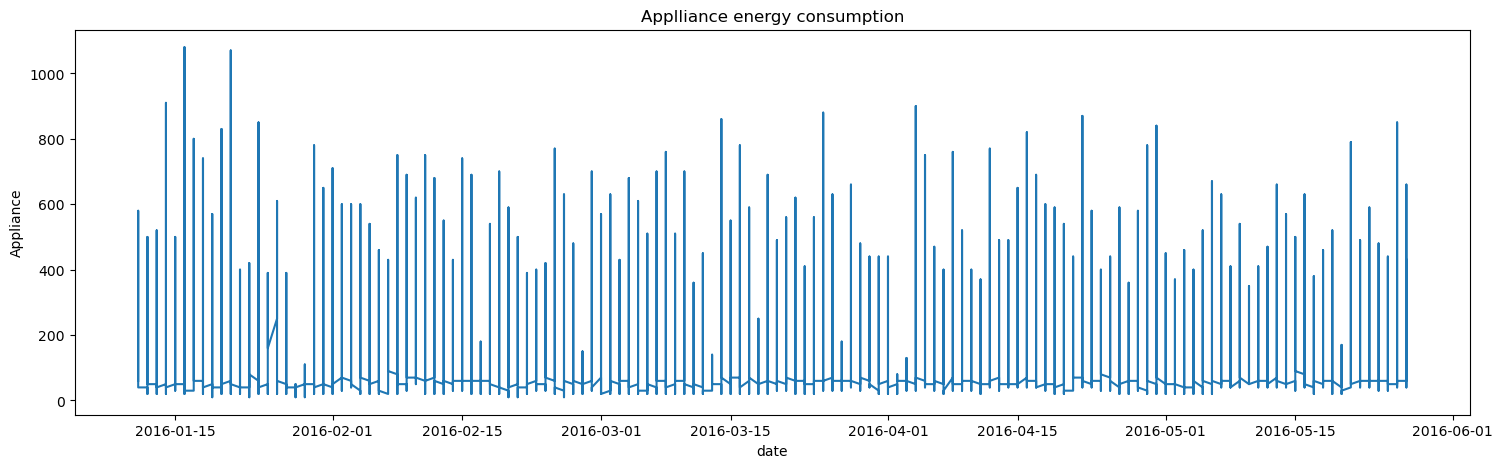

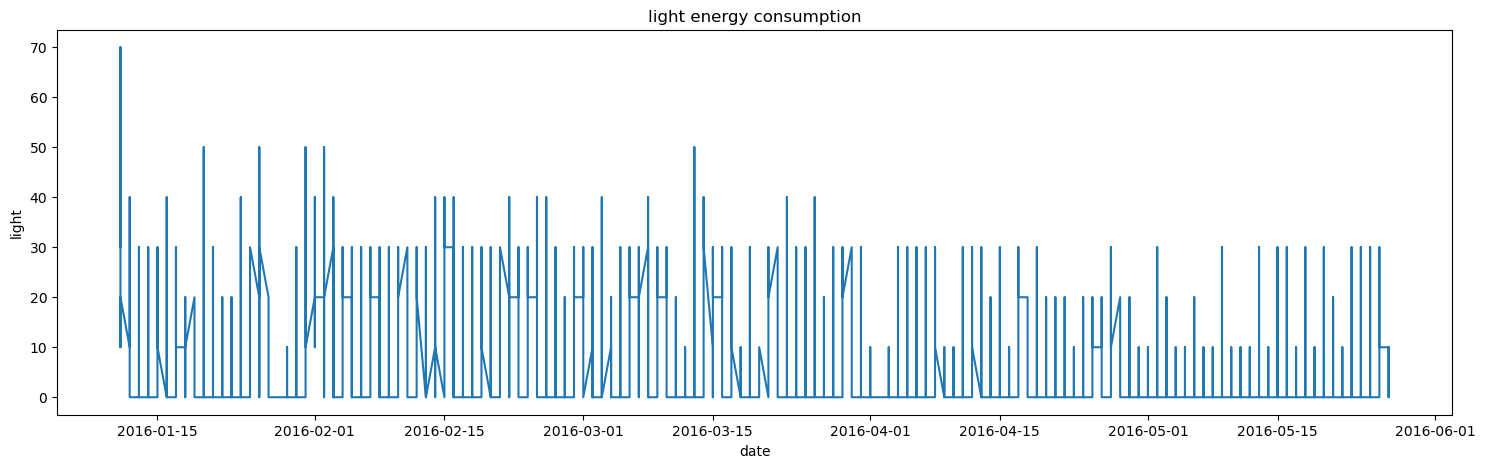

In [37]:
#ploting atmospheric pressure
date = data["Date"]
Pressure = data["Press_mm_hg"]
plt.figure(figsize=(18, 5))
plt.plot(date, Pressure, label="low")
plt.title("Pressure")
plt.xlabel("date")
plt.ylabel("Pressure")
plt.show()

#ploting appliance
date = data["Date"]
Appliance = data["Appliances"]
plt.figure(figsize=(18, 5))
plt.plot(date, Appliance, label="low")
plt.title("Applliance energy consumption")
plt.xlabel("date")
plt.ylabel("Appliance")
plt.show()

#ploting appliance
date = data["Date"]
light = data["lights"]
plt.figure(figsize=(18, 5))
plt.plot(date,light, label="low")
plt.title("light energy consumption")
plt.xlabel("date")
plt.ylabel("light")
plt.show()


when the atomospheric pressure is low it means it is raining, when the pressure is high it is warm weather. Jan month has the most energy consumption by appliances. So, it means peope used appliances more when its hot outside.  

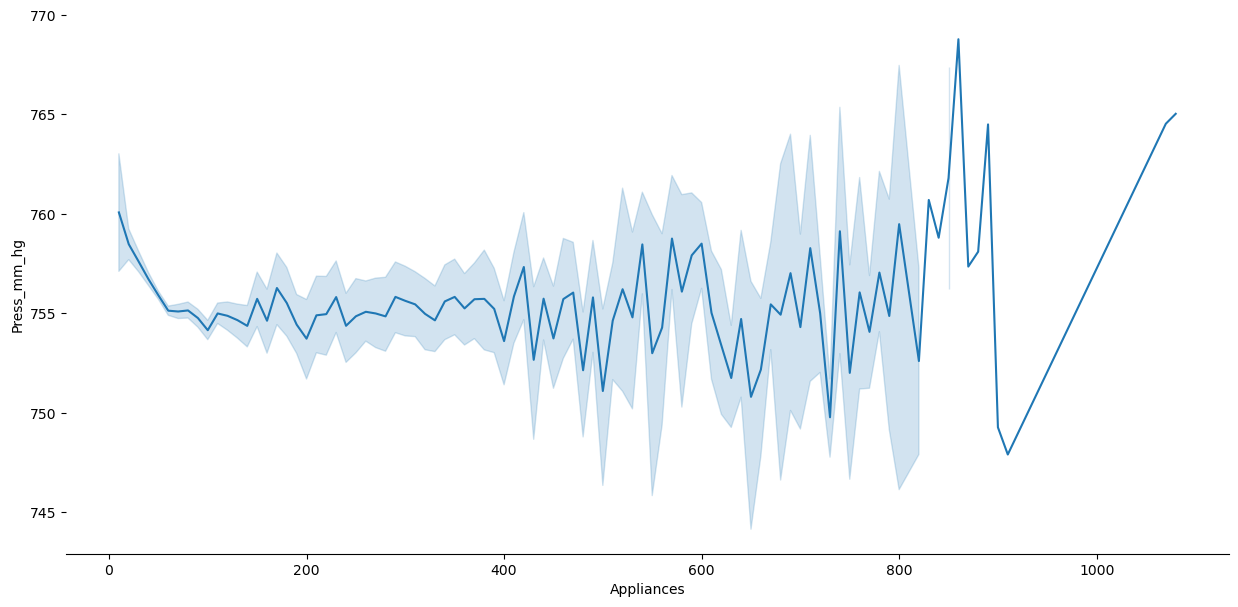

In [38]:
#plotting pressure and appliances
fig,ax = plt.subplots(figsize=(15,7))


chart=sns.lineplot(x='Appliances', y='Press_mm_hg', data= data)
sns.despine(left=True)

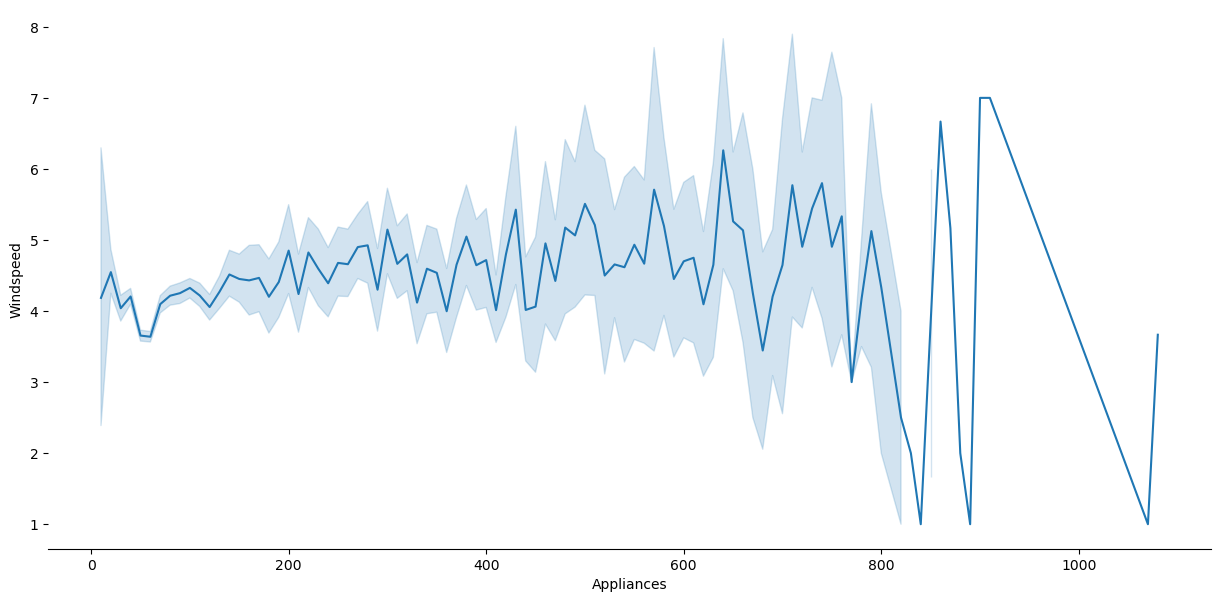

In [39]:
#plotting windspeed and appliances
fig,ax = plt.subplots(figsize=(15,7))


chart=sns.lineplot(x='Appliances', y='Windspeed', data= data)
sns.despine(left=True)


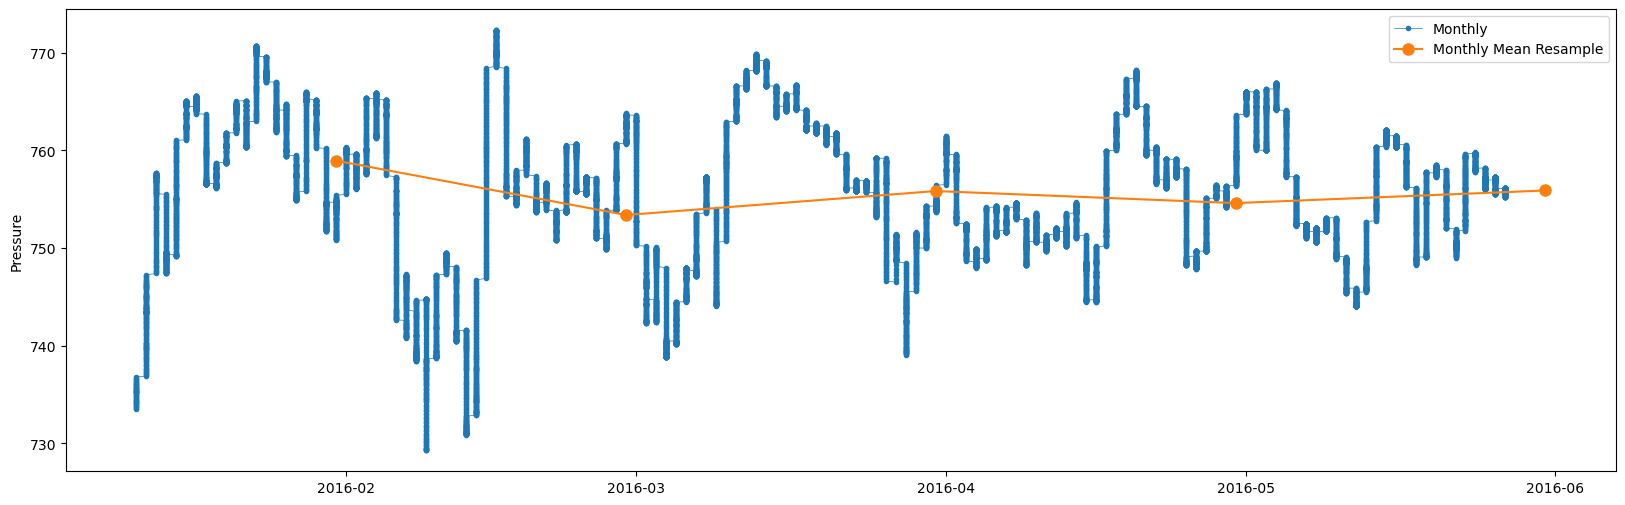

In [40]:
# plotting atomospheric pressure
y = energyweather['Press_mm_hg']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Pressure')
ax.legend();

**Predicting energy consumption of appliances :**

In [41]:
from sklearn import datasets, linear_model, metrics  

In [42]:
  
# defining feature matrix(X) and response vector(y)
data['Date'] = pd.to_numeric(pd.to_datetime(data['Date']))
X = data.drop(['Appliances','date','Time','hour','month'],axis=1)
y= data['Appliances']


In [43]:
data.head(5)

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...  RH_out  Windspeed  Visibility  Tdewpoint  \
0  19.79  44.730000  19.000000  ...    92.0   7.000000   63.000000        5.3   
1  19.79  44.790000  19.000000  ...    92.0   6.666667   59.166667        5.2   
2  19.79  44.933333  18.926667  ...    92.0   6.333333   55.333333        5.1   
3  19.79  45.000000  18.890000  ...    92.0   6.000000   51.500000        5.0   
4  19.79  45.000000  18.890000  ...    92.0   5.666667   47.666667        4.9   

         rv1        rv2                 Date      Time  hour  month  
0  13.275433  13.275433  1452470400000000000  17:00:00    17      1  
1  18.606195  18.606195  1452470400000000000  17:10:00    17      1  
2  28.642668  28.642668  1452470400000000000  17:20:00    17      1  
3  45.410389  45.410389  1452470400000000000  17:30:00    17      1  
4  10.084097  10.084097  1452470400000000000  17:40:00    17      1  

[5 rows x 33 columns]

### splitting X and y into training and testing sets


In [44]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)
  
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
model = reg.fit(X_train, y_train)
  

# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
  

Coefficients:  [ 2.10701497e+00 -4.41697796e-01  5.51176263e+00  2.72343315e+00
 -1.36504710e+00  6.75036379e-01  5.05899033e+00  5.67014970e-01
  1.82041197e+00  4.68058106e-01  2.15177465e-02  4.85827325e+00
  2.66747242e-02 -4.43710475e-01 -5.19444689e+00 -1.31659668e+00
 -3.16971412e+00 -1.22524724e-01 -1.03877196e+00 -2.69154890e+00
 -3.06211734e-01  1.45840922e-01  1.84988163e+00  1.12634603e-01
 -1.97831536e+00 -6.57470368e-03 -6.57470369e-03 -7.21644966e-16]
Variance score: 0.1211035828537822


The best possible score is 1.0, lower values are worse.  

In [45]:
y_pred =  model.predict(X_test)

In [46]:
from sklearn import metrics 
print(metrics.mean_absolute_error(y_test,y_pred))

print(metrics.mean_squared_error(y_test,y_pred)) 

55.076566343619675
9117.11060186151


In [47]:
from sklearn.metrics import r2_score
r_squared = reg.score(X, y)

#view R-squared value
print(r_squared)

0.11791055864926392


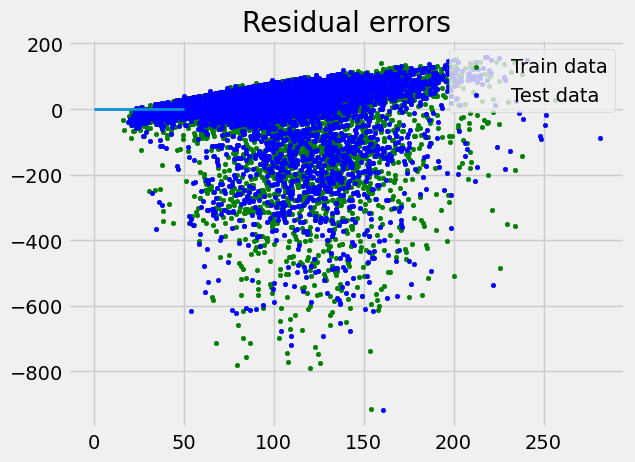

In [48]:
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

# Conclusion:
This analysis shows that how much impact weather conditions have in our day-today energy consumption in home. Whenever the atomospheric pressure is low or high, there's a evident change in the way enegry is consumed. 
    